In [1]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'Serif'

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from feature_engine.discretisation import EqualFrequencyDiscretiser
from category_encoders.woe import WOEEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from scipy import interp
from matplotlib import patches

In [2]:
df = pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Glucose_type']=label_encoder.fit_transform(df['Glucose'])
df['Insulin_type']=label_encoder.fit_transform(df['Insulin'])

In [5]:
del df['Glucose']
del df['Insulin']

In [6]:
df.head()

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_type,Insulin_type
0,6,72,35,33.6,0.627,50,1,86,0
1,1,66,29,26.6,0.351,31,0,23,0
2,8,64,0,23.3,0.672,32,1,121,0
3,1,66,23,28.1,0.167,21,0,27,62
4,0,40,35,43.1,2.288,33,1,75,102


In [7]:
x=df[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Glucose_type','Insulin_type']]
y=df[['Outcome']]
x.shape

(768, 8)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=30)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#scaled the x (train and test data)
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)
print("Mean value:",x_train_scaled.mean(axis=0))
print("SD value:",x_train_scaled.std(axis=0))

Mean value: [ 3.36978262e-17 -1.01093479e-16 -8.18375780e-17 -3.66463860e-16
  9.62795035e-17 -1.78117081e-16  2.64768635e-17  6.07764366e-17]
SD value: [1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
gaus=GaussianNB()
gaus.fit(x_train_scaled, y_train)

GaussianNB()

GaussianNB()

In [11]:
gaus.score(x_test_scaled,y_test)*100

83.33333333333334

In [12]:
prediction = gaus.predict(x_test_scaled)

print(prediction)

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]


In [13]:
from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(y_test,prediction)
print(conmat)

[[22  3]
 [ 2  3]]


In [14]:
data=pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

In [15]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [16]:
lvc= data.value_counts()
print(lvc)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [17]:
print(data.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [18]:
dict = {'Outcome':{'Diabetic':1,'Not Diabetic':0}}

In [19]:
data.replace(dict, inplace=True)
x= data.loc[:, data.columns !='Outcome']
y=data.loc[:, 'Outcome']

In [20]:
random_state = np.random.RandomState(0)

clf = RandomForestClassifier(random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=False)

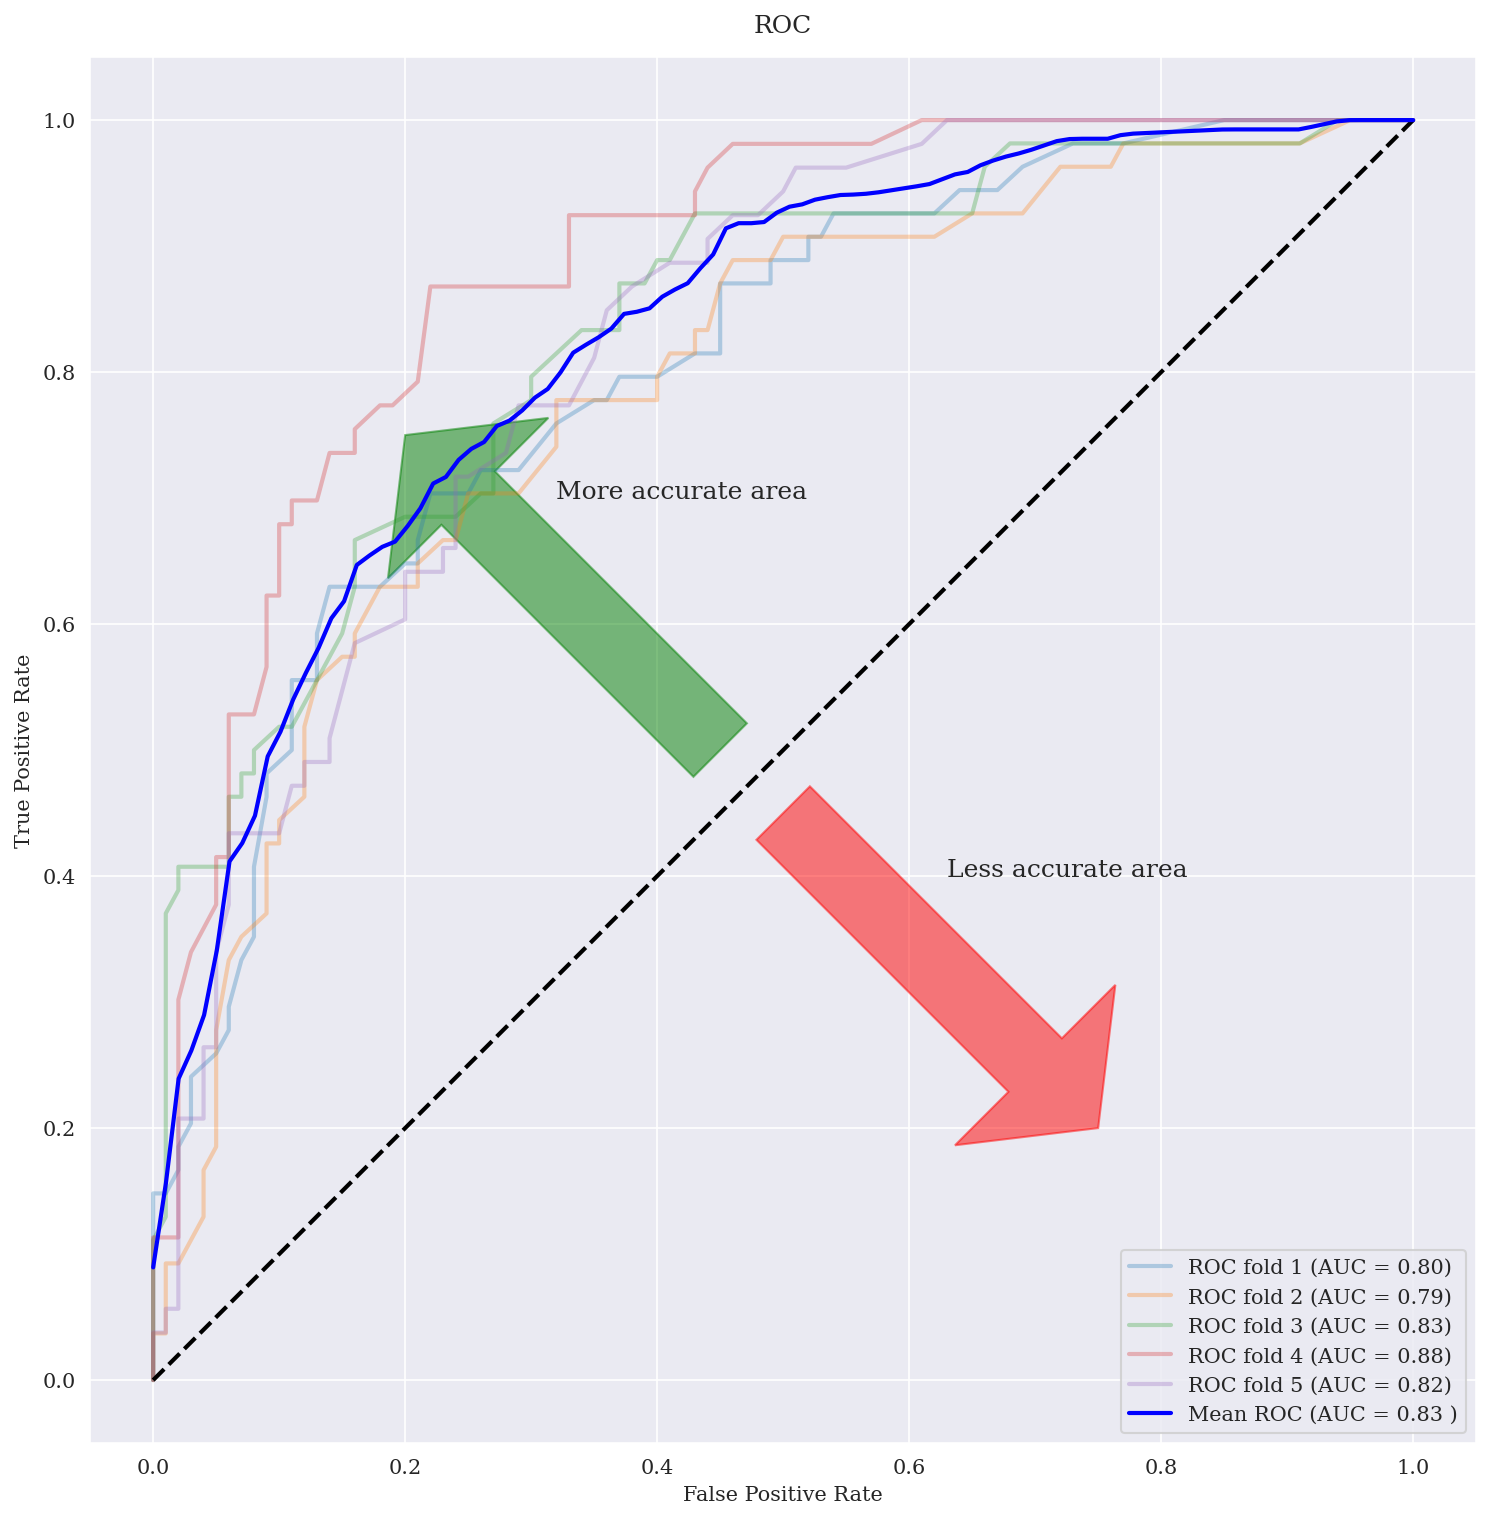

In [21]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()